## Imports and Setup

In [ ]:
#!git clone https://github.com/GFDRR/disaster-fcv-colocation-mapping.git
#%cd disaster-fcv-colocation-mapping
#!apt-get update && apt-get install -y --no-install-recommends gdal-bin
#!pip install -r requirements.txt

In [1]:
import os 
os.chdir('../')
from utils import data_download
from utils import data_utils
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

%load_ext autoreload
%autoreload 2

## Parameters

In [89]:
iso_code = "RWA"
adm_level = "ADM3"
acled_start_date = "2021-01-01"
acled_config_file = "configs/acled_credentials.yaml"
acled_config = data_utils.read_config(acled_config_file)

## Download Datasets

In [93]:
dm = data_download.DatasetManager(
    iso_code, 
    acled_key=acled_config["ACLED_key"], 
    acled_email=acled_config["ACLED_email"], 
    acled_start_date=acled_start_date
)
data = dm.generate_datasets()
data.sort_values("mhs_dfcv_conflict_exposure_relative", ascending=False).head(3)

,iso_code,ADM3,ADM3_ID,worldpop,earthquake,earthquake_exposure,landslide,landslide_exposure,cyclone,cyclone_exposure,geometry,population_best,conflict_count,null_conflict_count,conflict_exposure,dfcv_conflict_exposure,earthquake_exposure_relative,landslide_exposure_relative,cyclone_exposure_relative,conflict_exposure_relative,dfcv_conflict_exposure_relative,mhs_exposure_relative,mhs_dfcv_conflict_exposure_relative,mhs_exposure,mhs_dfcv_conflict_exposure
88,RWA,Gasaka,94199721B41646297917128,60269.378906,0.218661,60269.378906,3.125000,52052.335938,0.009346,0.0,"POLYGON ((29.61571 -2.47051, 29.61553 -2.47049...",6541.0,1.0,NaN,6541.0,58391.320312,1.0,0.863661,0.0,0.108529,0.968839,0.621220,0.601863,37440.571615,2.186204e+09
149,RWA,Boneza,94199721B17778384836964,30204.626953,0.221912,30204.626953,3.255319,25640.988281,0.003107,0.0,"MULTIPOLYGON (((29.15245 -1.91992, 29.15235 -1...",12438.0,1.0,NaN,12438.0,29258.589844,1.0,0.848909,0.0,0.411791,0.968679,0.616303,0.597000,18615.205078,5.446547e+08
173,RWA,Rugerero,94199721B25246697837793,71924.945312,0.208847,71924.945312,2.791667,47125.546875,0.001947,0.0,"POLYGON ((29.27015 -1.71473, 29.27041 -1.71484...",133286.0,11.0,6.0,26657.2,71924.945312,1.0,0.655204,0.0,0.370625,1.000000,0.551735,0.551735,39683.497396,2.854233e+09


## Visualize Data

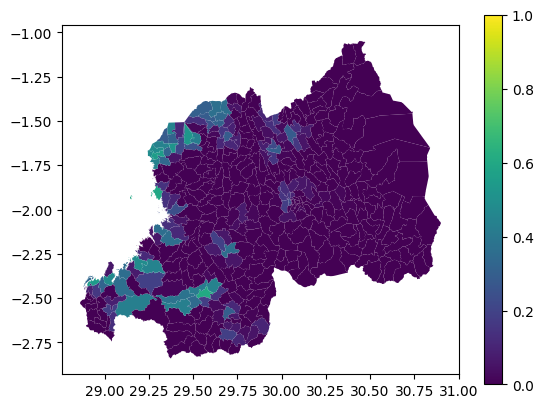

In [94]:
data.plot("mhs_dfcv_conflict_exposure_relative", legend=True, vmin=0, vmax=1);